### **Feature Selection**

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('/content/drive/MyDrive/DigiPay-Credit/Training Data.csv')
len(df.columns)

13

In [ ]:
'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS'

### **Model - Random Forest Classifier**

In [128]:
# Encoding Categorical Data
encoder = LabelEncoder()
categorical = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
for cols in categorical:
    df[cols] = encoder.fit_transform(df[cols])

In [129]:
X = df.drop(columns=['Risk_Flag', 'Id'])
y = df.Risk_Flag
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [130]:
model_full = RandomForestClassifier(n_estimators = 250)
model_full.fit(X_train,y_train)
prediction_full = model_full.predict(X_valid)
acc_full = accuracy_score(y_valid, prediction_full)
acc_full

0.8994444444444445

In [144]:
importances = model_full.feature_importances_
pd.Series(importances, X_train.columns).sort_values(ascending=False)

Income               0.190536
CITY                 0.164747
Profession           0.143620
Age                  0.142946
STATE                0.102836
Experience           0.081760
CURRENT_JOB_YRS      0.075000
CURRENT_HOUSE_YRS    0.064260
Car_Ownership        0.016142
Married/Single       0.009954
House_Ownership      0.008198
dtype: float64

### **Variance Threshold**

In [131]:
def selectionVarianceThreshold(data, variance_threshold=0.0):
    sel = VarianceThreshold(threshold=variance_threshold)
    sel_var=sel.fit_transform(data)
    sel_loc_index = sel.get_support(indices=True)

    if len(sel_loc_index)==0:
        return None
    else:
        return list(data.columns[sel_loc_index])



variance_threshold = 0.0005
feats_to_include_VT = selectionVarianceThreshold(X_train,
                        variance_threshold=variance_threshold)

feats_to_include_VT

['Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS']

In [132]:
X_vt = df[feats_to_include_VT]
X_trainvt, X_validvt, y_trainvt, y_validvt = train_test_split(X_vt, y, train_size=0.8, test_size=0.2)

model_vt = RandomForestClassifier(n_estimators = 250)
model_vt.fit(X_trainvt,y_trainvt)
prediction_vt = model_vt.predict(X_validvt)
acc_vt = accuracy_score(y_validvt, prediction_vt)
acc_vt

0.8978769841269841

### **Chi Squared**

In [134]:
chi_best_k = SelectKBest(chi2, k=10).fit((10*X).astype(int), y)
ch_best_feats = [feat for feat in list(chi_best_k.get_support()*X.columns) if feat !='']
ch_best_feats

['Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS']

In [135]:
X_chi = df[ch_best_feats]
X_trainchi, X_validchi, y_trainchi, y_validchi = train_test_split(X_chi, y, train_size=0.8, test_size=0.2)

In [136]:
model_chi = RandomForestClassifier(n_estimators = 250)
model_chi.fit(X_trainchi,y_trainchi)
prediction_chi = model_chi.predict(X_validchi)
acc_chi = accuracy_score(y_validchi, prediction_chi)
acc_chi

0.8993452380952381

### **ANOVA F-value**

In [137]:
fvalue_selector = SelectKBest(f_classif, k=10)
kbest_anova = fvalue_selector.fit(X, y)

anova_feats = [feat for feat in list(kbest_anova.get_support()*X.columns) if feat !='']
anova_feats

['Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS']

In [138]:
X_anova = df[anova_feats]
X_trainanova, X_validanova, y_trainanova, y_validanova = train_test_split(X_anova, y, train_size=0.8, test_size=0.2)

model_anova = RandomForestClassifier(n_estimators = 250)
model_anova.fit(X_trainanova,y_trainanova)
prediction_anova = model_anova.predict(X_validanova)
acc_anova = accuracy_score(y_validanova, prediction_anova)
acc_anova

0.9014285714285715

### **Information gain**

In [139]:
importances = mutual_info_classif(X_train, y_train)

feature_info = pd.Series(importances, X_train.columns).sort_values(ascending=False)
feature_info

House_Ownership      0.037950
Married/Single       0.030015
STATE                0.014752
Age                  0.010418
CURRENT_JOB_YRS      0.010368
Experience           0.009587
Profession           0.009497
CITY                 0.009204
Income               0.009098
CURRENT_HOUSE_YRS    0.008883
Car_Ownership        0.007799
dtype: float64

### **Correlation Coefficient**

In [140]:
train_transform = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
corr_matrix = train_transform.corr()

corr = corr_matrix['Risk_Flag'].abs().sort_values(ascending=False)
corr

Risk_Flag            1.000000
Experience           0.034799
House_Ownership      0.024468
Car_Ownership        0.023194
Age                  0.022715
Married/Single       0.021393
CURRENT_JOB_YRS      0.017470
Profession           0.004387
STATE                0.003790
CURRENT_HOUSE_YRS    0.003777
CITY                 0.003756
Income               0.002559
Name: Risk_Flag, dtype: float64

### **Lasso Regularization**

In [141]:
lasso = SelectFromModel(Lasso(alpha=0.001))
lasso.fit(X_train, y_train)
lasso_feats = [feat for feat in list(lasso.get_support()*X_valid.columns) if feat !='']
lasso_feats


['Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS']

In [142]:
X_lasso = df[lasso_feats]
X_trainlasso, X_validlasso, y_trainlasso, y_validlasso = train_test_split(X_lasso, y, train_size=0.8, test_size=0.2)

model_lasso = RandomForestClassifier(n_estimators = 250)
model_lasso.fit(X_trainlasso,y_trainlasso)
prediction_lasso = model_lasso.predict(X_validlasso)
acc_lasso = accuracy_score(y_validlasso, prediction_lasso)
acc_lasso

0.8974801587301587

### **Model Performance Comparison**

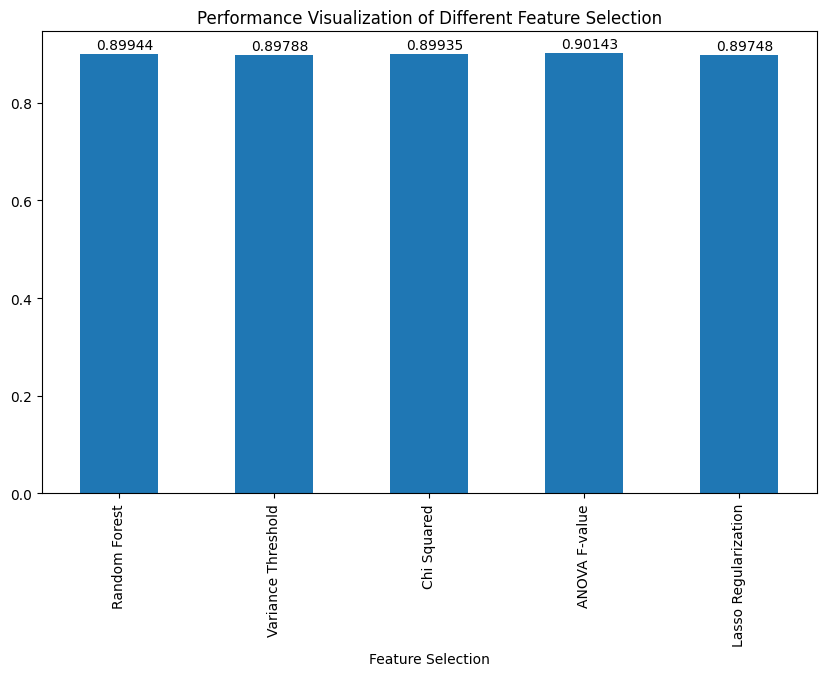

In [143]:
feature_selection = ["Random Forest","Variance Threshold","Chi Squared","ANOVA F-value","Lasso Regularization"]
accuracy_scores = [acc_full, acc_vt, acc_chi, acc_anova, acc_lasso]
df = pd.DataFrame({"Feature Selection":feature_selection,
                   "Accuracy score":accuracy_scores})
ax = df.plot(x="Feature Selection",y="Accuracy score", figsize=(10,6),kind="bar",
        title="Performance Visualization of Different Feature Selection", legend = False)
for p in ax.patches:
        ax.annotate('{:.5f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

In [124]:
df.head()

,Feature Selection,Accuracy score
0,Random Forest,0.899544
1,Variance Threshold,0.897758
2,Chi Squared,0.899524
3,ANOVA F-value,0.899881
4,Lasso Regularization,0.900417
